In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df=pd.read_csv("/Users/carlotacarvalho/Desktop/Ironhack/Github/lab-eda-univariate/amz_uk_price_prediction_dataset.csv")

In [4]:
df.head()
#uid - Unique identifier for each row.
#asin - Product ID from Amazon.
#title - Title of the product. 
#stars - Product rating. If 0, no ratings were found.
#reviews - Number of customer reviews. If 0, no reviews were found. 
#price - Price of the product.
#isBestSeller - Whether the product had the Amazon BestSeller status or not.
#boughtInLastMonth - Indicates how many products we sold last month.
#category - Product category.

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [5]:
df.shape

(2443651, 9)

In [6]:
df.dtypes

uid                    int64
asin                  object
title                 object
stars                float64
reviews                int64
price                float64
isBestSeller            bool
boughtInLastMonth      int64
category              object
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2443651 entries, 0 to 2443650
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   uid                int64  
 1   asin               object 
 2   title              object 
 3   stars              float64
 4   reviews            int64  
 5   price              float64
 6   isBestSeller       bool   
 7   boughtInLastMonth  int64  
 8   category           object 
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 151.5+ MB


In [12]:
df.isnull().sum()

uid                  0
asin                 0
title                0
stars                0
reviews              0
price                0
isBestSeller         0
boughtInLastMonth    0
category             0
dtype: int64

# Understanding Product Categories 

### Frequency tables

In [15]:
frequency_table=df.category.value_counts().sort_values(ascending=False)
frequency_table

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Alexa Built-In Devices                       107
Motorbike Chassis                            107
Plugs                                        107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: count, Length: 296, dtype: int64

Top 5 most listed product categories are:
- Sports & Outdoors
- Beauty
- Handmade Clothing, Shoes & Acessories
- Bath & Body
- Birthday Gifts

### Visualizations

<function matplotlib.pyplot.show(close=None, block=None)>

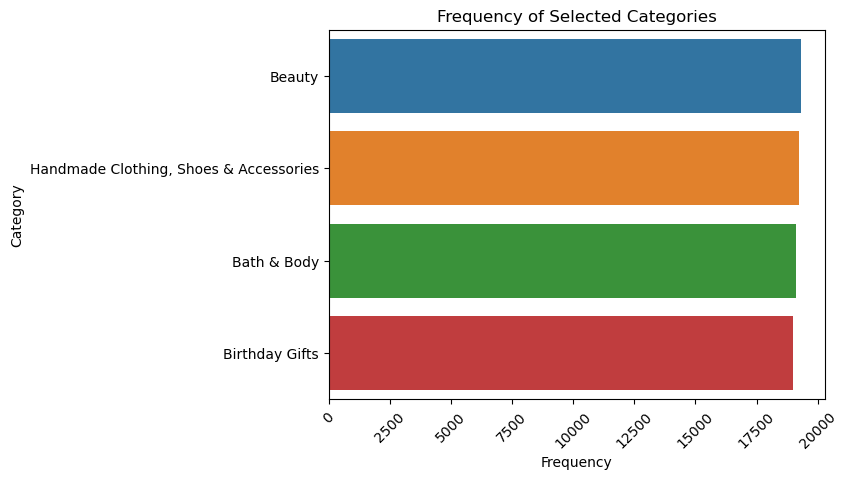

In [24]:
lista=["Beauty", "Handmade Clothing, Shoes & Accessories", "Bath & Body", "Birthday Gifts"]
filtered_frequency_table = frequency_table[frequency_table.index.isin(lista)]
sns.barplot(x=filtered_frequency_table.values, y=filtered_frequency_table.index,orient="h")
plt.title('Frequency of Selected Categories')
plt.xlabel('Frequency')
plt.ylabel('Category')
plt.xticks(rotation=45)
plt.show

# Delving into Product Pricing

### Measures of Centrality

In [48]:
mean_price=df.price.mean()
mean_price

89.24380943923663

In [49]:
mode_price=df.price.mode()
mode_price

0    9.99
Name: price, dtype: float64

In [50]:
median_price=df.price.median()
median_price

19.09

### Measures of Dispersion:

In [51]:
variance_price=df.price.var()
variance_price

119445.48532256528

In [52]:
standard_deviation_price=df.price.std()
standard_deviation_price

345.60886175352226

In [53]:
range_price=df.price.max()-df.price.min()
range_price

100000.0

In [54]:
df.price.max()

100000.0

In [55]:
df.price.min()

0.0

In [56]:
Q1_price=df.price.quantile(0.25)
Q3_price=df.price.quantile(0.75)
Interquantile_range_price=Q3-Q1
Interquantile_range_price

36.0

### Visualizations

<Axes: xlabel='price', ylabel='Count'>

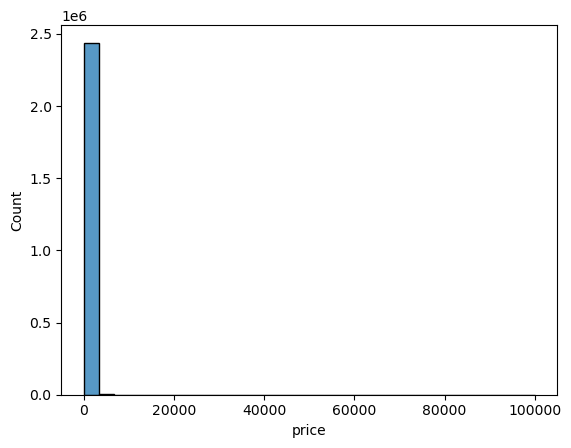

In [40]:
sns.histplot(df.price, bins=30)

<Axes: >

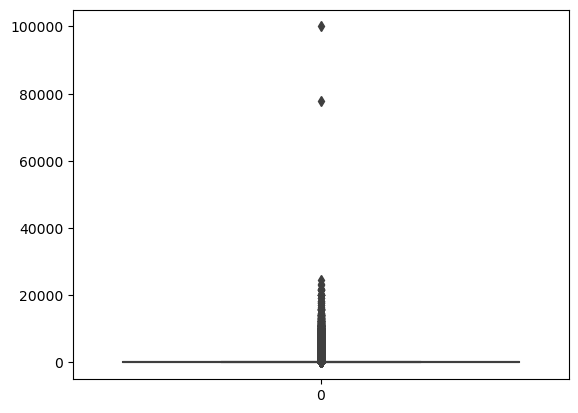

In [47]:
sns.boxplot(data=df.price)

# Unpacking Product Ratings

### Measures of Centrality

In [57]:
mean_rating=df.stars.mean()
mean_rating

2.152836472966065

In [58]:
mode_rating=df.stars.mode()
mode_rating

0    0.0
Name: stars, dtype: float64

In [59]:
median_rating=df.stars.median()
median_rating

0.0

In [60]:
df.stars.value_counts()

stars
0.0    1225641
4.5     151577
4.6     136995
4.4     136165
5.0     128492
4.3     112564
4.7      94566
4.2      86871
4.0      66089
4.1      65115
4.8      41858
3.9      36555
3.8      27876
3.7      21137
3.6      16219
3.5      14673
3.0      12819
4.9      11081
3.4      10355
1.0       8484
3.3       8269
3.2       5771
3.1       4679
2.0       3901
2.9       3341
2.8       2306
2.7       2104
2.5       2103
2.6       1579
2.4       1060
2.3        734
2.2        602
2.1        540
1.5        404
1.9        300
1.8        249
1.7        177
1.4        149
1.6        147
1.3         78
1.2         23
1.1          3
Name: count, dtype: int64

### Measures of Dispersion

In [61]:
variance_rating=df.stars.var()
variance_rating

4.81743402976196

In [62]:
standard_deviation_rating=df.stars.std()
standard_deviation_rating

2.1948653785054697

In [63]:
Q1_rating=df.stars.quantile(0.25)
Q3_rating=df.stars.quantile(0.75)
Interquantile_range_rating=Q3_rating-Q1_rating
Interquantile_range_rating

4.4

### Shape of the Distribution

In [66]:
df.stars.skew().round(2)

0.08

- Skewness = 0: The distribution is perfectly symmetrical, resembling a normal distribution.
- Skewness > 0: The distribution is positively skewed (or right-skewed), meaning there is a longer tail on the right side of the distribution. The mass of the distribution is concentrated on the left of the figure.
- Skewness < 0: The distribution is negatively skewed (or left-skewed), meaning there is a longer tail on the left side of the distribution. The mass of the distribution is concentrated on the right of the figure.

In [67]:
df.stars.kurtosis().round(2)

-1.93

- Excess Kurtosis = 0: The distribution has the same kurtosis as a normal distribution, known as mesokurtic. It indicates a distribution with tails similar to the normal distribution.
- Excess Kurtosis > 0: The distribution is leptokurtic. It has fatter tails and a sharper peak than the normal distribution, indicating more extreme values (outliers) than expected in a normal distribution.
- Excess Kurtosis < 0: The distribution is platykurtic. It has thinner tails and a flatter peak than the normal distribution, indicating fewer extreme values than expected in a normal distribution.

### Visualizations

<Axes: xlabel='stars', ylabel='Count'>

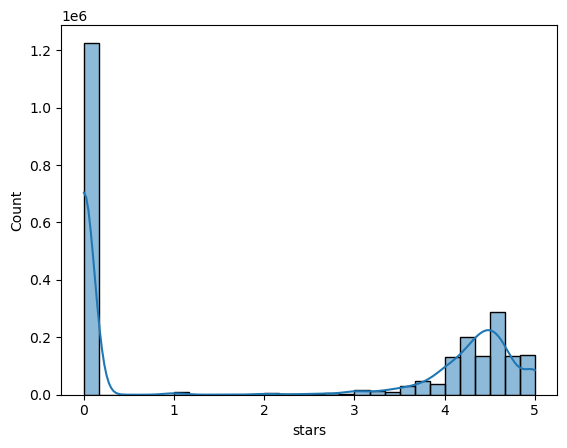

In [70]:
sns.histplot(data=df.stars, kde=True, bins=30)